# EDA, FE, FS & Modeling Assignment
## HouseLoki
## 1828232
## Ashish Arya

In [1]:
# Installing required package
!pip install catboost

In [2]:
#  For Filtering out the warnings after Cell Execution
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Importing the csv data
df = pd.read_csv('1828232.csv')

In [5]:
# Checking first five columns of dataframe
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR associates,2019-05-29 00:00:00,2019.0,1.929342e+09,2019-05-18,20190518,20190518,20190602.0,USD,RV,1.0,NaN,51659.25,20190518.0,NAH4,1.929342e+09,0
1,U001,0200759878,SA systems,2019-08-05 00:00:00,2019.0,1.929643e+09,2019-07-20,20190720,20190720,20190804.0,USD,RV,1.0,NaN,55509.15,20190720.0,NAH4,1.929643e+09,0
2,CA02,0140104472,MARTIN co,2020-01-29 00:00:00,2020.0,2.960606e+09,2020-01-08,20200108,20200108,20200125.0,CAD,RV,1.0,NaN,7845.12,20200115.0,CA10,2.960606e+09,0
3,U001,0200434439,BAUGH SU co,2019-04-15 00:00:00,2019.0,1.929042e+09,2019-03-29,20190328,20190329,20190413.0,USD,RV,1.0,NaN,14523.30,20190329.0,NAA8,1.929042e+09,0
4,CA02,0140104423,METRO trust,2019-03-01 00:00:00,2019.0,2.960530e+09,2019-02-21,20190221,20190221,20190304.0,CAD,RV,1.0,NaN,259024.26,20190222.0,CA10,2.960530e+09,0


In [6]:
# Checking the datatype and dataframe shape
print(df.dtypes)
df.shape

business_code              object
cust_number                object
name_customer              object
clear_date                 object
buisness_year             float64
doc_id                    float64
posting_date               object
document_create_date        int64
document_create_date.1      int64
due_in_date               float64
invoice_currency           object
document type              object
posting_id                float64
area_business             float64
total_open_amount         float64
baseline_create_date      float64
cust_payment_terms         object
invoice_id                float64
isOpen                      int64
dtype: object


(50000, 19)

In [7]:
# Converting all the date columns into datetime format
df['document_create_date'] = pd.to_datetime(df['document_create_date'],format='%Y%m%d')
df['document_create_date.1'] = pd.to_datetime(df['document_create_date.1'],format='%Y%m%d')
df['clear_date'] = pd.to_datetime(df['clear_date'])
df['clear_date'] = pd.to_datetime(df['clear_date'],format='%Y%m%d')
df['posting_date'] = pd.to_datetime(df['posting_date'])
df['posting_date'] = pd.to_datetime(df['posting_date'],format='%Y%m%d')
df['due_in_date'] = df['due_in_date'].astype(int)
df['baseline_create_date'] = df['baseline_create_date'].astype(int)
df['due_in_date'] = pd.to_datetime(df['due_in_date'],format='%Y%m%d')
df['baseline_create_date'] = pd.to_datetime(df['baseline_create_date'],format='%Y%m%d')
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR associates,2019-05-29,2019.0,1.929342e+09,2019-05-18,2019-05-18,2019-05-18,2019-06-02,USD,RV,1.0,NaN,51659.25,2019-05-18,NAH4,1.929342e+09,0
1,U001,0200759878,SA systems,2019-08-05,2019.0,1.929643e+09,2019-07-20,2019-07-20,2019-07-20,2019-08-04,USD,RV,1.0,NaN,55509.15,2019-07-20,NAH4,1.929643e+09,0
2,CA02,0140104472,MARTIN co,2020-01-29,2020.0,2.960606e+09,2020-01-08,2020-01-08,2020-01-08,2020-01-25,CAD,RV,1.0,NaN,7845.12,2020-01-15,CA10,2.960606e+09,0
3,U001,0200434439,BAUGH SU co,2019-04-15,2019.0,1.929042e+09,2019-03-29,2019-03-28,2019-03-29,2019-04-13,USD,RV,1.0,NaN,14523.30,2019-03-29,NAA8,1.929042e+09,0
4,CA02,0140104423,METRO trust,2019-03-01,2019.0,2.960530e+09,2019-02-21,2019-02-21,2019-02-21,2019-03-04,CAD,RV,1.0,NaN,259024.26,2019-02-22,CA10,2.960530e+09,0


In [8]:
# Checking the total number rows which has isOpen value as 1
print(len(df.loc[df['isOpen'] == 1]))

4848


In [9]:
# Checking the rows which has clear_date value as NaN 
df['clear_date'].isna().sum()

4848

In [10]:
# As the rows which has clear_date as NaN is present 45152 onwards and I already checked that.
# So I will be splitting the dataframe into two and df_NaN will be used as Super Test Set at the end.
df_NaN = df.iloc[45152:,:]
df = df.iloc[:45152,:]

In [11]:
# Now we check that there is no NaN values in clear_date column in our dataframe.
df['clear_date'].isna().sum()

0

In [12]:
# Making a copy of the dataframe.
df_copy = df
df_copy.shape

(45152, 19)

In [13]:
# As we can see that area_business has only NaN values and posting_id has only 1 as its value.
# And isOpen column has only 0 as its value. So we will drop these constant columns later in this notebook.
print(df_copy['area_business'].describe())
print(df_copy['posting_id'].describe())
print()
print(len(df_copy.loc[df_copy['isOpen'] == 1]))

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: area_business, dtype: float64
count    45152.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: posting_id, dtype: float64

0


In [14]:
# Checking if there is any negative amount to be paid as it will be an anomaly.
len(df_copy.loc[(df_copy['total_open_amount'] < 0)])

0

In [15]:
# As shown earlier isOpen has only 0 as its value. So doing a double check.
df_copy['isOpen'].describe()

count    45152.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: isOpen, dtype: float64

In [16]:
# Since there is two document_create_date column but we can see that some values of document_create_date.1 is greater than document_create_date
# So we will keep this column and remove document_create_date column.
df_copy.loc[(df_copy['document_create_date'] <= df_copy['document_create_date.1'])]

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR associates,2019-05-29,2019.0,1.929342e+09,2019-05-18,2019-05-18,2019-05-18,2019-06-02,USD,RV,1.0,NaN,51659.25,2019-05-18,NAH4,1.929342e+09,0
1,U001,0200759878,SA systems,2019-08-05,2019.0,1.929643e+09,2019-07-20,2019-07-20,2019-07-20,2019-08-04,USD,RV,1.0,NaN,55509.15,2019-07-20,NAH4,1.929643e+09,0
2,CA02,0140104472,MARTIN co,2020-01-29,2020.0,2.960606e+09,2020-01-08,2020-01-08,2020-01-08,2020-01-25,CAD,RV,1.0,NaN,7845.12,2020-01-15,CA10,2.960606e+09,0
3,U001,0200434439,BAUGH SU co,2019-04-15,2019.0,1.929042e+09,2019-03-29,2019-03-28,2019-03-29,2019-04-13,USD,RV,1.0,NaN,14523.30,2019-03-29,NAA8,1.929042e+09,0
4,CA02,0140104423,METRO trust,2019-03-01,2019.0,2.960530e+09,2019-02-21,2019-02-21,2019-02-21,2019-03-04,CAD,RV,1.0,NaN,259024.26,2019-02-22,CA10,2.960530e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45146,U001,0200780825,SYSCO FO llc,2019-06-21,2019.0,1.929210e+09,2019-05-02,2019-04-25,2019-05-02,2019-05-22,USD,RV,1.0,NaN,1111.07,2019-05-02,NAD1,1.929210e+09,0
45147,U001,0200769623,WAL-MAR co,2019-08-21,2019.0,1.929714e+09,2019-08-10,2019-08-09,2019-08-10,2019-08-25,USD,RV,1.0,NaN,13616.72,2019-08-10,NAH4,1.929714e+09,0
45149,U001,0200418007,AM,2019-05-31,2019.0,1.929317e+09,2019-05-16,2019-05-14,2019-05-16,2019-08-14,USD,RV,1.0,NaN,6256.32,2019-05-16,NAVR,1.929317e+09,0
45150,U001,0200186937,SYSC trust,2020-02-07,2020.0,1.930397e+09,2020-01-14,2020-01-14,2020-01-14,2020-02-03,USD,RV,1.0,NaN,42515.06,2020-01-14,NAD1,1.930397e+09,0


In [17]:
# Dropping the columns which I mentioned earlier.
df_copy.drop(['area_business', 'posting_id', 'isOpen', 'document_create_date'], axis=1, inplace=True)

In [18]:
# Sorting the dataset on the basis of document_create_date.1
df_copy = df_copy.sort_values(['document_create_date.1'], ascending = (True))

In [19]:
# Reseting the index.
df_copy.reset_index(drop=True, inplace=True)

In [20]:
# I found that only 3 values of posting_date is different from document_create_date.1.
# Rest entire posting_date column is same as document_create_date.1.
df_copy.loc[(df_copy['posting_date'] != df_copy['document_create_date.1'])]

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id
6999,CA02,0140106054,TREE us,2019-05-31,2019.0,9.500000e+09,2019-03-29,2019-03-06,2019-03-16,CAD,X2,1570.59,2019-03-06,CA10,NaN
7855,CA02,0140104409,LOB trust,2019-05-22,2019.0,9.500000e+09,2019-03-29,2019-03-14,2019-03-24,CAD,X2,542.00,2019-03-14,CA10,NaN
9784,CA02,0140104223,H Y LO corporation,2019-05-08,2019.0,9.500000e+09,2019-04-30,2019-03-29,2019-04-08,CAD,X2,27816.00,2019-03-29,CA10,NaN


In [21]:
# I found that only 3 values of doc_id is different from invoice_id.
# Rest entire doc_id column is same as invoice_id.
df_copy.loc[(df_copy['doc_id'] != df_copy['invoice_id'])]

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id
6999,CA02,0140106054,TREE us,2019-05-31,2019.0,9.500000e+09,2019-03-29,2019-03-06,2019-03-16,CAD,X2,1570.59,2019-03-06,CA10,NaN
7855,CA02,0140104409,LOB trust,2019-05-22,2019.0,9.500000e+09,2019-03-29,2019-03-14,2019-03-24,CAD,X2,542.00,2019-03-14,CA10,NaN
9784,CA02,0140104223,H Y LO corporation,2019-05-08,2019.0,9.500000e+09,2019-04-30,2019-03-29,2019-04-08,CAD,X2,27816.00,2019-03-29,CA10,NaN


In [22]:
# Dropping the duplicate columns which I just found out.
df_copy.drop(['posting_date', 'invoice_id'], axis=1, inplace=True)

### Dropping Anomalies from dataset
As we know doc create date <= posting date <= baseline date < due date <= clearing date.
Dropping all those records which does not follow above rule.

In [23]:
print((df_copy['document_create_date.1'] > df_copy['baseline_create_date']).sum())
idx = df_copy.index[df_copy['document_create_date.1'] > df_copy['baseline_create_date']].tolist()
df_copy.drop(idx, inplace=True)

2004


In [24]:
print((df_copy['document_create_date.1'] > df_copy['due_in_date']).sum())
idx = df_copy.index[df_copy['document_create_date.1'] > df_copy['due_in_date']].tolist()
df_copy.drop(idx, inplace=True)

0


In [25]:
print((df_copy['document_create_date.1'] > df_copy['clear_date']).sum())

0


In [26]:
print((df_copy['baseline_create_date'] >= df_copy['due_in_date']).sum())
idx = df_copy.index[df_copy['baseline_create_date'] >= df_copy['due_in_date']].tolist()
df_copy.drop(idx, inplace=True)

682


In [27]:
print((df_copy['baseline_create_date'] >= df_copy['clear_date']).sum())
idx = df_copy.index[df_copy['baseline_create_date'] >= df_copy['clear_date']].tolist()
df_copy.drop(idx, inplace=True)

51


In [28]:
# Checking the shape of dataframe and seeing the top 5 records of dataframe
print(df_copy.shape)
df_copy.head()

(42415, 13)


,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms
0,U001,0200769623,WAL-MAR us,2019-01-10,2019.0,1.928544e+09,2018-12-30,2019-01-14,USD,RV,10831.45,2018-12-30,NAH4
1,U001,0200769623,WAL-MAR llc,2019-01-10,2019.0,1.928544e+09,2018-12-30,2019-01-14,USD,RV,46365.90,2018-12-30,NAH4
2,U001,0200769623,WAL-MAR corporation,2019-01-16,2019.0,1.928534e+09,2018-12-30,2019-01-14,USD,RV,14181.44,2018-12-30,NAH4
3,U001,0200769623,WAL-MAR,2019-01-09,2019.0,1.928545e+09,2018-12-30,2019-01-14,USD,RV,1764.66,2018-12-30,NAH4
4,U001,0200769623,WAL-MAR associates,2019-01-09,2019.0,1.928543e+09,2018-12-30,2019-01-14,USD,RV,39352.50,2018-12-30,NAH4


In [29]:
# Reseting the index
df_copy.reset_index(drop=True, inplace=True)

In [30]:
# Getting the number of days alloted once the business_deal comes into action and baseline_create_date is entered in the document.
df_copy['days_alloted'] = df_copy['due_in_date'] - df_copy['baseline_create_date']
df_copy['days_alloted'] = df_copy['days_alloted'].dt.days

In [31]:
# Since there are only two types of currency:- USD and CAD so converting the total_open_amount in USD only.
temp = df_copy[['total_open_amount', 'invoice_currency']].copy()
temp.head()

,total_open_amount,invoice_currency
0,10831.45,USD
1,46365.90,USD
2,14181.44,USD
3,1764.66,USD
4,39352.50,USD


In [32]:
# Funtion to convert currency.
def convert_to_usd(args):  
    amount, currency = args
    rates = {'USD': 1, 'CAD': 1.26}
    return rates[currency] * amount

temp['In_USD'] = temp.apply(convert_to_usd, axis=1)

In [33]:
temp.loc[(temp['invoice_currency'] == 'CAD')]

,total_open_amount,invoice_currency,In_USD
68,63552.94,CAD,80076.7044
91,1824.47,CAD,2298.8322
132,89597.99,CAD,112893.4674
139,292.65,CAD,368.7390
158,6026.25,CAD,7593.0750
...,...,...,...
42293,40199.93,CAD,50651.9118
42347,94030.25,CAD,118478.1150
42351,10782.47,CAD,13585.9122
42389,28446.67,CAD,35842.8042


In [34]:
# Updating the total_open_amount column.
df_copy['total_open_amount'] = temp['In_USD'].copy()

In [35]:
# Getting the info about dataframe.
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42415 entries, 0 to 42414
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           42415 non-null  object        
 1   cust_number             42415 non-null  object        
 2   name_customer           42415 non-null  object        
 3   clear_date              42415 non-null  datetime64[ns]
 4   buisness_year           42415 non-null  float64       
 5   doc_id                  42415 non-null  float64       
 6   document_create_date.1  42415 non-null  datetime64[ns]
 7   due_in_date             42415 non-null  datetime64[ns]
 8   invoice_currency        42415 non-null  object        
 9   document type           42415 non-null  object        
 10  total_open_amount       42415 non-null  float64       
 11  baseline_create_date    42415 non-null  datetime64[ns]
 12  cust_payment_terms      42415 non-null  object

In [36]:
# Checking the total unique values in various columns.
print("business_code: ", df_copy['business_code'].nunique())
print("cust_number: ", df_copy['cust_number'].nunique())
print("name_customer: ", df_copy['name_customer'].nunique())
print("cust_payment_terms: ", df_copy['cust_payment_terms'].nunique())
print("doc_id: ",df_copy['doc_id'].nunique())
print("invoice_currency: ", df_copy['invoice_currency'].nunique())
print("document type: ", df_copy['document type'].nunique())

business_code:  5
cust_number:  1369
name_customer:  4153
cust_payment_terms:  51
doc_id:  42415
invoice_currency:  2
document type:  2


In [37]:
# Finding out the delay between clear_date and due_in_date.
df_copy['delay'] = df_copy['clear_date'] - df_copy['due_in_date']
df_copy['delay'] = df_copy['delay'].dt.days

In [38]:
# Function to show diagnostic plot and to check the distribution of target column.
import scipy.stats as stats
import pylab
def diagnostic_plots(df, variable):
  # function to plot a histogram and a Q-Q plot
  # side by side, for a certain variable
  plt.figure(figsize=(15,6))
  plt.subplot(1, 2, 1)
  df[variable].hist()
  plt.subplot(1, 2, 2)
  stats.probplot(df[variable], dist="norm", plot=pylab)
  plt.show()

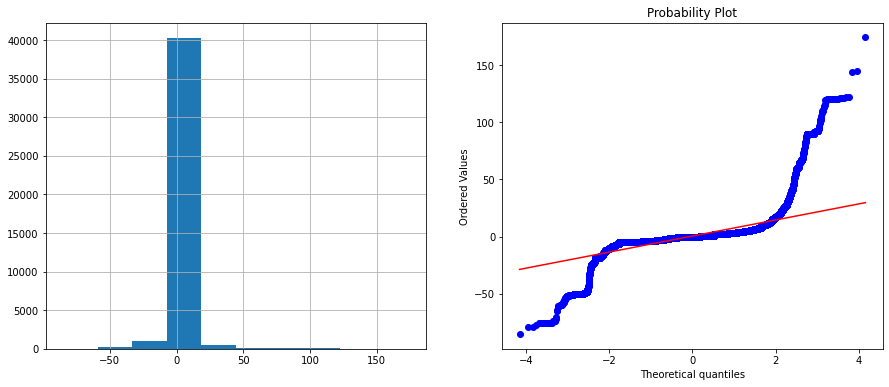

In [39]:
diagnostic_plots(df_copy, 'delay')

In [40]:
# Dropping the columns which has less role in model training.
df_copy.drop(['doc_id', 'name_customer', 'clear_date', 'buisness_year', 'document_create_date.1', 'due_in_date', 'baseline_create_date'], axis=1, inplace=True)

In [41]:
df_copy.head()

,business_code,cust_number,invoice_currency,document type,total_open_amount,cust_payment_terms,days_alloted,delay
0,U001,0200769623,USD,RV,10831.45,NAH4,15,-4
1,U001,0200769623,USD,RV,46365.90,NAH4,15,-4
2,U001,0200769623,USD,RV,14181.44,NAH4,15,2
3,U001,0200769623,USD,RV,1764.66,NAH4,15,-5
4,U001,0200769623,USD,RV,39352.50,NAH4,15,-5


In [42]:
# Saving the column names for future use.
col_name = ['business_code', 'cust_number', 'invoice_currency', 'document type', 'total_open_amount', 'cust_payment_terms', 'days_alloted']

In [43]:
# Splitting Data into Train and Test and Validation.
from sklearn.model_selection import train_test_split
X = df_copy.iloc[: ,:-1].values
y = df_copy['delay'].values
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42, shuffle=False)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.1, random_state=42, shuffle=False)

In [44]:
# Checking the shape and seeing that the shape is in accordance with model training and evaluation.
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((34355, 7), (4242, 7), (3818, 7), (34355,), (4242,), (3818,))

In [45]:
# Converting from numpy array into pandas.
X_train = pd.DataFrame(X_train)
X_val = pd.DataFrame(X_val)
X_test = pd.DataFrame(X_test)
X_train.columns = col_name
X_val.columns = col_name
X_test.columns = col_name

In [46]:
# Making a mapper dictionary to encode business_code column of trainset and map it to testset and validationset.
mapper0 = {'U001': 1, 'CA02': 2, 'U013': 3, 'U002': 4, 'U005': 5}
X_train['business_code'] = X_train['business_code'].map(mapper0)
X_train['business_code'] = X_train['business_code'].replace(np.nan, 6)

In [47]:
X_val['business_code'] = X_val['business_code'].map(mapper0)
X_val['business_code'] = X_val['business_code'].replace(np.nan, 6)
X_test['business_code'] = X_test['business_code'].map(mapper0)
X_test['business_code'] = X_test['business_code'].replace(np.nan, 6)

In [48]:
# Checking the value_counts of unique elements in business_code column.
X_train['business_code'].value_counts()

1    30827
2     2883
3      511
4      126
5        8
Name: business_code, dtype: int64

In [49]:
# Checking the value_counts of unique elements in cust_number column.
X_train['cust_number'].value_counts()

0200769623    7965
0200726979    1352
0200762301    1075
0200759878     946
0200794332     770
              ... 
200790165        1
CC7420           1
0100052832       1
0100028210       1
0200987178       1
Name: cust_number, Length: 1313, dtype: int64

In [50]:
# Making a mapper dictionary to encode cust_number column in trainset and map it to testset and validationset.
labels = X_train['cust_number'].astype('category').cat.categories.tolist()
mapper1 = {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}
X_train['cust_number'] = X_train['cust_number'].map(mapper1)
X_train['cust_number'] = X_train['cust_number'].replace(np.nan, 0)

In [51]:
X_val['cust_number'] = X_val['cust_number'].map(mapper1)
X_val['cust_number'] = X_val['cust_number'].replace(np.nan, 0)
X_test['cust_number'] = X_test['cust_number'].map(mapper1)
X_test['cust_number'] = X_test['cust_number'].replace(np.nan, 0)

In [52]:
# Checking the value_counts of unique elements in invoice_currency column.
X_train['invoice_currency'].value_counts()

USD    31472
CAD     2883
Name: invoice_currency, dtype: int64

In [53]:
# Label encodind invoice_currency column in trainset and mapping it to testset and validationset.
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X_train['invoice_currency'] = le.fit_transform(X_train['invoice_currency'])

In [54]:
X_val['invoice_currency'] = le.transform(X_val['invoice_currency'])
X_test['invoice_currency'] = le.transform(X_test['invoice_currency'])

In [55]:
# Dropping document type column as it is quasi-constant
print(X_train['document type'].value_counts())
X_train.drop(['document type'], axis=1, inplace=True)

RV    34352
X2        3
Name: document type, dtype: int64


In [56]:
X_val.drop(['document type'], axis=1, inplace=True)
X_test.drop(['document type'], axis=1, inplace=True)

In [57]:
# Converting total_open_amount column from object to float.
X_train['total_open_amount'] = X_train['total_open_amount'].astype(float)

In [58]:
X_val['total_open_amount'] = X_val['total_open_amount'].astype(float)
X_test['total_open_amount'] = X_test['total_open_amount'].astype(float)

In [59]:
# Making a mapper dictionary to encode cust_payment_terms column in trainset and map it to testset and validationset.
mapper5 = {'NAA8': 1, 'NAH4': 2, 'CA10': 4, 'NAC6': 5}
X_train['cust_payment_terms'] = X_train['cust_payment_terms'].map(mapper5)
X_train['cust_payment_terms'] = X_train['cust_payment_terms'].replace(np.nan, 3)

In [60]:
X_val['cust_payment_terms'] = X_val['cust_payment_terms'].map(mapper5)
X_val['cust_payment_terms'] = X_val['cust_payment_terms'].replace(np.nan, 3)
X_test['cust_payment_terms'] = X_test['cust_payment_terms'].map(mapper5)
X_test['cust_payment_terms'] = X_test['cust_payment_terms'].replace(np.nan, 3)

In [61]:
# Checking the value_counts of unique elements in cust_payment_terms column.
X_train['cust_payment_terms'].value_counts()

1.0    14692
2.0     9520
3.0     6105
4.0     2816
5.0     1222
Name: cust_payment_terms, dtype: int64

In [62]:
# Converting days_alloted column from object to int.
X_train['days_alloted'] = X_train['days_alloted'].astype(int)

In [63]:
X_val['days_alloted'] = X_val['days_alloted'].astype(int)
X_test['days_alloted'] = X_test['days_alloted'].astype(int)

In [64]:
X_train.head(20)

,business_code,cust_number,invoice_currency,total_open_amount,cust_payment_terms,days_alloted
0,1,798,1,10831.45,2.0,15
1,1,798,1,46365.90,2.0,15
2,1,798,1,14181.44,2.0,15
3,1,798,1,1764.66,2.0,15
4,1,798,1,39352.50,2.0,15
5,1,780,1,15619.87,1.0,15
6,1,695,1,190.38,1.0,15
7,1,798,1,9522.21,2.0,15
8,1,798,1,39118.11,2.0,15
9,1,798,1,15597.27,2.0,15


### Target Encoding

In [65]:
X_train['target'] = y_train 

target_mapper1 = X_train.groupby('cust_number')['target'].mean().to_dict()
print(target_mapper1)
X_train.drop(['target'], axis=1, inplace=True)

{1: 36.333333333333336, 2: -15.666666666666666, 3: 40.2, 4: 5.0, 5: -5.0, 6: -5.703703703703703, 7: -23.0, 8: -6.5, 9: -8.0, 10: 4.2, 11: 1.4285714285714286, 12: -6.0, 13: 6.0, 14: 1.0, 15: 0.6666666666666666, 16: 4.0, 17: -2.7, 18: 1.0, 19: -3.0, 20: -4.5, 21: 9.0, 22: -1.5714285714285714, 23: 0.2, 24: -25.6, 25: -3.933333333333333, 26: -6.0, 27: 2.0, 28: 1.8636363636363635, 29: -27.0, 30: 1.5, 31: 4.5, 32: 19.0, 33: 1.0, 34: 2.0, 35: -1.5, 36: 6.125, 37: 12.5, 38: -2.0, 39: 1.894736842105263, 40: 6.5, 41: -0.5, 42: -1.875, 43: -19.0, 44: 10.5, 45: -3.0, 46: 1.0, 47: 108.0, 48: -3.0, 49: 3.6666666666666665, 50: 3.2, 51: 0.4166666666666667, 52: 1.0, 53: 7.214285714285714, 54: 2.0, 55: -4.1, 56: -4.0, 57: 12.0, 58: -0.5, 59: 3.0, 60: 1.3333333333333333, 61: -2.6666666666666665, 62: 2.0, 63: 3.0, 64: -2.484848484848485, 65: 21.0, 66: 0.0, 67: -4.0, 68: -6.0, 69: 3.2, 70: 9.0, 71: 5.6, 72: 2.75, 73: -9.4, 74: 24.875, 75: 8.5, 76: 0.0, 77: -1.6666666666666667, 78: 1.75, 79: 4.3333333333333

In [66]:
# Created a dictionary which is grouped by cust_number and encoding target value for better training results.
# Target Encoding has been done on trainset and has been mapped to testset and validationset.
X_train['target_encoded1'] = X_train['cust_number'].map(target_mapper1)
mean = X_train['target_encoded1'].mean()
mean

0.6835977295881587

In [67]:
X_val['target_encoded1'] = X_val['cust_number'].map(target_mapper1)
X_val['target_encoded1'] = X_val['target_encoded1'].replace(np.nan, mean)
X_test['target_encoded1'] = X_test['cust_number'].map(target_mapper1)
X_test['target_encoded1'] = X_test['target_encoded1'].replace(np.nan, mean)

In [68]:
# Standard Scaling the entire trainset and then mapping it to testset and validationset.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [69]:
col_name = ['business_code', 'cust_number', 'invoice_currency', 'total_open_amount', 'cust_payment_terms', 'days_alloted', 'target_encoded1']
X_train = pd.DataFrame(X_train)
X_val = pd.DataFrame(X_val)
X_test = pd.DataFrame(X_test)
X_train.columns = col_name
X_val.columns = col_name
X_test.columns = col_name
X_train.head()

,business_code,cust_number,invoice_currency,total_open_amount,cust_payment_terms,days_alloted,target_encoded1
0,-0.309796,0.250987,0.302664,-0.540520,-0.018489,-0.247909,-0.486867
1,-0.309796,0.250987,0.302664,0.259255,-0.018489,-0.247909,-0.486867
2,-0.309796,0.250987,0.302664,-0.465122,-0.018489,-0.247909,-0.486867
3,-0.309796,0.250987,0.302664,-0.744587,-0.018489,-0.247909,-0.486867
4,-0.309796,0.250987,0.302664,0.101404,-0.018489,-0.247909,-0.486867


In [70]:
X_train.dtypes

business_code         float64
cust_number           float64
invoice_currency      float64
total_open_amount     float64
cust_payment_terms    float64
days_alloted          float64
target_encoded1       float64
dtype: object

In [71]:
X_train.head()

,business_code,cust_number,invoice_currency,total_open_amount,cust_payment_terms,days_alloted,target_encoded1
0,-0.309796,0.250987,0.302664,-0.540520,-0.018489,-0.247909,-0.486867
1,-0.309796,0.250987,0.302664,0.259255,-0.018489,-0.247909,-0.486867
2,-0.309796,0.250987,0.302664,-0.465122,-0.018489,-0.247909,-0.486867
3,-0.309796,0.250987,0.302664,-0.744587,-0.018489,-0.247909,-0.486867
4,-0.309796,0.250987,0.302664,0.101404,-0.018489,-0.247909,-0.486867


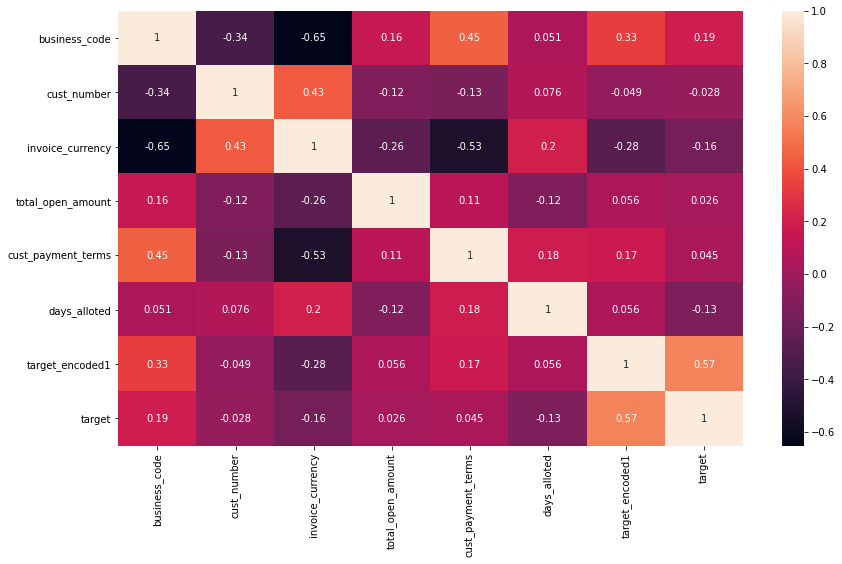

In [72]:
# Checking if the columns in my trainset are correlated among each other.
# Since no columns are correlated amongst each other so not dropping any columns otherwise I would have dropped any one column out of the two correlated ones.
X_train['target'] = y_train
corr=X_train.corr()
plt.figure(figsize=(14,8))
X_train.drop(['target'], axis=1, inplace=True)
sns.heatmap(corr,annot=True)

In [73]:
# Using Embedded method to find feature importance.
def tree_based_feature_importance(x_train,y_train):
    from sklearn.ensemble import RandomForestRegressor
    # create the random forest model
    model = RandomForestRegressor(n_estimators=120)

    # fit the model to start training.
    model.fit(x_train, y_train)

    # get the importance of the resulting features.
    importances = model.feature_importances_

    # create a data frame for visualization.
    final_df = pd.DataFrame({"Features": x_train.columns, "Importances":importances})
    final_df.set_index('Importances')

    # sort in descending order 
    final_df = final_df.sort_values('Importances',ascending=False)
    
    #visualising feature importance
    pd.Series(model.feature_importances_, index=x_train.columns).nlargest(4).plot(kind='barh')  
    return final_df

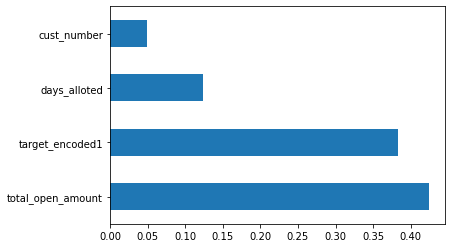

In [74]:
feature_importance=tree_based_feature_importance(X_train,y_train)#features importance data frame

In [75]:
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((34355, 7), (4242, 7), (3818, 7), (34355,), (4242,), (3818,))

In [76]:
# Making a copy of trainset, validationset and testset.
X_traincopy = X_train.copy(deep=True)
X_valcopy = X_val.copy(deep=True)
X_testcopy = X_test.copy(deep=True)

## Selecting Features on which I got the best results.

In [77]:
X_traincopy.drop(['invoice_currency', 'business_code', 'cust_payment_terms'], axis=1, inplace=True)
X_valcopy.drop(['invoice_currency', 'business_code', 'cust_payment_terms'], axis=1, inplace=True)
X_testcopy.drop(['invoice_currency', 'business_code', 'cust_payment_terms'], axis=1, inplace=True)

In [78]:
X_traincopy = np.array(X_traincopy)
X_valcopy = np.array(X_valcopy)
X_testcopy = np.array(X_testcopy)

In [79]:
# Modeling & Accuracy Metrics
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [80]:
# Function to find RMSE score.
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [81]:
# Defining Lists to Store in the Results and Names of Algorithms
RMSE_Score = []
R2_Score = []
Algorithm = []

#### Trying out different models and then I will display a scorecard at last on the basis of which I will finalise my model.

In [82]:
# Fitting Simple Linear Regression to the Training Set
Algorithm.append('Linear Regression')
clf = LinearRegression()
clf.fit(X_traincopy, y_train)

# Predicting the Val Set Results
predicted = clf.predict(X_valcopy)

In [83]:
# Appending the Scores For Visualisation at a Later Part
RMSE_Score.append(rmse(predicted, y_val))
R2_Score.append(r2_score(y_val, predicted))

In [84]:
# Fitting Random Forest Regressor Tree to the Training Set
Algorithm.append('Random Forest Regressor')
clf = RandomForestRegressor(n_estimators=300, random_state=0)
clf.fit(X_traincopy, y_train)

# Predicting the Val Set Results
predicted = clf.predict(X_valcopy)

In [85]:
# Appending the Scores For Visualisation at a Later Part
RMSE_Score.append(rmse(predicted, y_val))
R2_Score.append(r2_score(y_val, predicted))

In [86]:
# Fitting XGBoost Regressor to the Training Set
Algorithm.append('XGB Regressor')
clf = xgb.XGBRegressor()
clf.fit(X_traincopy, y_train)

# Predicting the Val Set Results
predicted = clf.predict(X_valcopy)

[11:40:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [87]:
# Appending the Scores For Visualisation at a Later Part
RMSE_Score.append(rmse(predicted, y_val))
R2_Score.append(r2_score(y_val, predicted))

In [88]:
# Fitting CatBoost Regressor to the Training Set
Algorithm.append('CatBoost Regressor')
from catboost import CatBoostRegressor

model = CatBoostRegressor(iterations=100,
                          learning_rate=0.04,
                          depth=16)

model.fit(
        X_traincopy, y_train,
        eval_set=(X_valcopy, y_val),
        verbose=True
    )
predicted = model.predict(X_valcopy)

0:	learn: 9.9324904	test: 9.7162283	best: 9.7162283 (0)	total: 1.66s	remaining: 2m 44s
1:	learn: 9.7969875	test: 9.5930342	best: 9.5930342 (1)	total: 1.81s	remaining: 1m 28s
2:	learn: 9.6637805	test: 9.4649613	best: 9.4649613 (2)	total: 2.96s	remaining: 1m 35s
3:	learn: 9.5335107	test: 9.3428865	best: 9.3428865 (3)	total: 4.14s	remaining: 1m 39s
4:	learn: 9.4109318	test: 9.2365755	best: 9.2365755 (4)	total: 5.32s	remaining: 1m 41s
5:	learn: 9.2992976	test: 9.1392701	best: 9.1392701 (5)	total: 6.48s	remaining: 1m 41s
6:	learn: 9.1915347	test: 9.0539648	best: 9.0539648 (6)	total: 7.65s	remaining: 1m 41s
7:	learn: 9.0873024	test: 8.9612648	best: 8.9612648 (7)	total: 8.84s	remaining: 1m 41s
8:	learn: 8.9960972	test: 8.8862655	best: 8.8862655 (8)	total: 9.95s	remaining: 1m 40s
9:	learn: 8.9026053	test: 8.8038212	best: 8.8038212 (9)	total: 11.1s	remaining: 1m 40s
10:	learn: 8.8157344	test: 8.7279816	best: 8.7279816 (10)	total: 12.3s	remaining: 1m 39s
11:	learn: 8.7319658	test: 8.6582206	best

In [89]:
# Appending the Scores For Visualisation at a Later Part
RMSE_Score.append(rmse(predicted, y_val))
R2_Score.append(r2_score(y_val, predicted))

In [90]:
# Just Combining the Lists into a DataFrame for a Better Visualisation
Comparison = pd.DataFrame(list(zip(Algorithm, RMSE_Score, R2_Score)), columns = ['Algorithm', 'RMSE_Score', 'R2_Score'])

In [91]:
# Score Card
Comparison

,Algorithm,RMSE_Score,R2_Score
0,Linear Regression,8.379406,0.273366
1,Random Forest Regressor,8.530637,0.246900
2,XGB Regressor,7.896517,0.354702
3,CatBoost Regressor,7.602426,0.401872


## As we can see that CatBoost Regressor gave the best test accuracy which 40.2% approximately.

### So I finalised CatBoost Regressor and I obtained results on TestSet and displayed it in a DataFrame

In [92]:
predicted = model.predict(X_testcopy)
predicted = np.round_(predicted)
results = pd.DataFrame(predicted, columns=['predicted_delay'])
results['actual_delay'] = y_test
results.head(10)

,predicted_delay,actual_delay
0,6.0,-1
1,5.0,2
2,3.0,0
3,3.0,0
4,0.0,-1
5,1.0,-6
6,-0.0,-1
7,2.0,0
8,1.0,0
9,-3.0,-5


In [93]:
# Obtaining the minimum and maximum delay which will help me create Aging_Bucket Dictionary
print("Minimum negative delay according to our dataset: ",df_copy['delay'].min())
print("Maximum postive delay according to our dataset: ",df_copy['delay'].max())

Minimum negative delay according to our dataset:  -85
Maximum postive delay according to our dataset:  174


In [94]:
# Creating the aging bucket dictionary.
class RangeDict(dict):
    def __getitem__(self, item):
        if not isinstance(item, range): # or xrange in Python 2
            for key in self:
                if item in key:
                    return self[key]
            raise KeyError(item)
        else:
            return super().__getitem__(item)
result_mapper = RangeDict({range(-100,16): '0-15 days', range(16,31): '16-30 days', range(31,46): '31-45 days', range(46,61): '45-60 days', range(60, 365): 'Greater than 60 days'})

In [95]:
delay = []
for i in results['predicted_delay']:
  delay.append(result_mapper[i])
results['predicted_aging_bucket'] = delay

In [96]:
delay = []
for i in results['actual_delay']:
  delay.append(result_mapper[i])
results['actual_aging_bucket'] = delay

## Displaying the results of the model prediction on the test set in the form of DataFrame.

In [97]:
results.head(10)

,predicted_delay,actual_delay,predicted_aging_bucket,actual_aging_bucket
0,6.0,-1,0-15 days,0-15 days
1,5.0,2,0-15 days,0-15 days
2,3.0,0,0-15 days,0-15 days
3,3.0,0,0-15 days,0-15 days
4,0.0,-1,0-15 days,0-15 days
5,1.0,-6,0-15 days,0-15 days
6,-0.0,-1,0-15 days,0-15 days
7,2.0,0,0-15 days,0-15 days
8,1.0,0,0-15 days,0-15 days
9,-3.0,-5,0-15 days,0-15 days


In [98]:
# Checking if the model predictions lies in different types of buckets or not as in the top 10 records above we can only see 0-15 days buckets
results['predicted_aging_bucket'].value_counts()

0-15 days     3803
16-30 days       8
31-45 days       4
45-60 days       3
Name: predicted_aging_bucket, dtype: int64

## Checking the accuracy of the model in determing buckets.

In [99]:
right_bucket = (results['predicted_aging_bucket'] == results['actual_aging_bucket']).sum()
print("Accuracy in predicting buckets on test set: ", (right_bucket/len(results))*100)

Accuracy in predicting buckets on test set:  98.50707176532217


## Now the dataframe which we had split above we will obtain predictions on them. I call it Super Test Set

In [100]:
df_NaN.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
45152,U001,0200769623,WAL-MAR corp,NaT,2020.0,1.930639e+09,2020-03-12,2020-03-12,2020-03-12,2020-03-27,USD,RV,1.0,NaN,24006.55,2020-03-12,NAH4,1.930639e+09,1
45153,U001,0200769623,WAL-MAR systems,NaT,2020.0,1.930779e+09,2020-04-14,2020-04-11,2020-04-14,2020-04-29,USD,RV,1.0,NaN,162.70,2020-04-14,NAH4,1.930779e+09,1
45154,U001,0200769623,WAL-MAR corp,NaT,2020.0,1.930729e+09,2020-04-01,2020-04-01,2020-04-01,2020-04-16,USD,RV,1.0,NaN,1898.20,2020-04-01,NAH4,1.930729e+09,1
45155,CA02,0140104440,SO associates,NaT,2020.0,2.960623e+09,2020-03-23,2020-03-23,2020-03-23,2020-04-04,CAD,RV,1.0,NaN,117628.50,2020-03-25,CA10,2.960623e+09,1
45156,U001,0200455322,PEA,NaT,2020.0,1.930684e+09,2020-03-22,2020-03-21,2020-03-22,2020-04-21,USD,RV,1.0,NaN,73228.93,2020-03-22,NAD5,1.930684e+09,1


In [101]:
# Doing all the steps which were done above to bring the dataframe in such a form that our model can do predictions,
df_NaN['days_alloted'] = df_NaN['due_in_date'] - df_NaN['baseline_create_date']
df_NaN['days_alloted'] = df_NaN['days_alloted'].dt.days

temp = df_NaN[['total_open_amount', 'invoice_currency']].copy()

def convert_to_usd(args):  
    amount, currency = args
    rates = {'USD': 1, 'CAD': 1.26}
    return rates[currency] * amount

temp['In_USD'] = temp.apply(convert_to_usd, axis=1)

df_NaN['total_open_amount'] = temp['In_USD'].copy()

df_NaN.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,days_alloted
45152,U001,0200769623,WAL-MAR corp,NaT,2020.0,1.930639e+09,2020-03-12,2020-03-12,2020-03-12,2020-03-27,USD,RV,1.0,NaN,24006.55,2020-03-12,NAH4,1.930639e+09,1,15
45153,U001,0200769623,WAL-MAR systems,NaT,2020.0,1.930779e+09,2020-04-14,2020-04-11,2020-04-14,2020-04-29,USD,RV,1.0,NaN,162.70,2020-04-14,NAH4,1.930779e+09,1,15
45154,U001,0200769623,WAL-MAR corp,NaT,2020.0,1.930729e+09,2020-04-01,2020-04-01,2020-04-01,2020-04-16,USD,RV,1.0,NaN,1898.20,2020-04-01,NAH4,1.930729e+09,1,15
45155,CA02,0140104440,SO associates,NaT,2020.0,2.960623e+09,2020-03-23,2020-03-23,2020-03-23,2020-04-04,CAD,RV,1.0,NaN,148211.91,2020-03-25,CA10,2.960623e+09,1,10
45156,U001,0200455322,PEA,NaT,2020.0,1.930684e+09,2020-03-22,2020-03-21,2020-03-22,2020-04-21,USD,RV,1.0,NaN,73228.93,2020-03-22,NAD5,1.930684e+09,1,30


In [102]:
# Doing all the processing and mapping so that we can let our model do predictions.
df_NaN_features = df_NaN[['business_code', 'cust_number', 'invoice_currency', 'document type', 'total_open_amount', 'cust_payment_terms', 'days_alloted']].copy()

df_NaN_features['business_code'] = df_NaN_features['business_code'].map(mapper0)
df_NaN_features['business_code'] = df_NaN_features['business_code'].replace(np.nan, 6)

df_NaN_features['cust_number'] = df_NaN_features['cust_number'].map(mapper1)
df_NaN_features['cust_number'] = df_NaN_features['cust_number'].replace(np.nan, 0)

df_NaN_features['invoice_currency'] = le.transform(df_NaN_features['invoice_currency'])

df_NaN_features.drop(['document type'], axis=1, inplace=True)

df_NaN_features['total_open_amount'] = df_NaN_features['total_open_amount'].astype(float)

df_NaN_features['cust_payment_terms'] = df_NaN_features['cust_payment_terms'].map(mapper5)
df_NaN_features['cust_payment_terms'] = df_NaN_features['cust_payment_terms'].replace(np.nan, 3)

df_NaN_features['days_alloted'] = df_NaN_features['days_alloted'].astype(int)

df_NaN_features['target_encoded1'] = df_NaN_features['cust_number'].map(target_mapper1)
df_NaN_features['target_encoded1'] = df_NaN_features['target_encoded1'].replace(np.nan, mean)

df_NaN_features = scaler.transform(df_NaN_features)
col_name = ['business_code', 'cust_number', 'invoice_currency', 'total_open_amount', 'cust_payment_terms', 'days_alloted', 'target_encoded1']

df_NaN_features = pd.DataFrame(df_NaN_features)
df_NaN_features.columns = col_name
df_NaN_features.drop(['invoice_currency', 'business_code', 'cust_payment_terms'], axis=1, inplace=True)

df_NaN_features.head()

,cust_number,total_open_amount,days_alloted,target_encoded1
0,0.250987,-0.243988,-0.247909,-0.486867
1,0.250987,-0.780643,-0.247909,-0.486867
2,0.250987,-0.741582,-0.247909,-0.486867
3,-1.650509,2.551508,-0.715496,0.944510
4,-0.784318,0.863863,1.154852,1.237547


In [103]:
# Finally obtaining predictions and storing the clear_date in clear_date column and created delay column and aging_bucket column.
from datetime import timedelta

df_NaN_features = np.array(df_NaN_features)
prediction = model.predict(df_NaN_features)
prediction = np.round_(prediction)
df_NaN['delay'] = prediction

delay = []
for i in df_NaN['delay']:
  delay.append(result_mapper[i])
df_NaN['aging_bucket'] = delay

df_NaN['delay'] = df_NaN['delay'].astype(int)

clear_date = []
for i,j in zip(df_NaN['document_create_date.1'], df_NaN['delay']):
  clear_date.append(i + timedelta(days= j))

df_NaN['clear_date'] = clear_date
df_NaN.head(10)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,days_alloted,delay,aging_bucket
45152,U001,0200769623,WAL-MAR corp,2020-03-10,2020.0,1.930639e+09,2020-03-12,2020-03-12,2020-03-12,2020-03-27,USD,RV,1.0,NaN,24006.550,2020-03-12,NAH4,1.930639e+09,1,15,-2,0-15 days
45153,U001,0200769623,WAL-MAR systems,2020-04-15,2020.0,1.930779e+09,2020-04-14,2020-04-11,2020-04-14,2020-04-29,USD,RV,1.0,NaN,162.700,2020-04-14,NAH4,1.930779e+09,1,15,1,0-15 days
45154,U001,0200769623,WAL-MAR corp,2020-03-30,2020.0,1.930729e+09,2020-04-01,2020-04-01,2020-04-01,2020-04-16,USD,RV,1.0,NaN,1898.200,2020-04-01,NAH4,1.930729e+09,1,15,-2,0-15 days
45155,CA02,0140104440,SO associates,2020-03-28,2020.0,2.960623e+09,2020-03-23,2020-03-23,2020-03-23,2020-04-04,CAD,RV,1.0,NaN,148211.910,2020-03-25,CA10,2.960623e+09,1,10,5,0-15 days
45156,U001,0200455322,PEA,2020-03-30,2020.0,1.930684e+09,2020-03-22,2020-03-21,2020-03-22,2020-04-21,USD,RV,1.0,NaN,73228.930,2020-03-22,NAD5,1.930684e+09,1,30,8,0-15 days
45157,U001,0200418007,AM us,2020-04-16,2020.0,1.930769e+09,2020-04-14,2020-04-09,2020-04-14,2020-04-29,USD,RV,1.0,NaN,1195.600,2020-04-14,NAA8,1.930769e+09,1,15,2,0-15 days
45158,CA02,0140106408,WAL-M trust,2020-03-29,2020.0,2.960623e+09,2020-03-21,2020-03-21,2020-03-21,2020-03-31,CAD,RV,1.0,NaN,125160.273,2020-03-21,CA10,2.960623e+09,1,10,8,0-15 days
45159,U001,0200704045,RA trust,2020-04-16,2020.0,1.930794e+09,2020-04-15,2020-04-16,2020-04-15,2020-04-30,USD,RV,1.0,NaN,12738.640,2020-04-15,NAA8,1.930794e+09,1,15,1,0-15 days
45160,U001,0200769623,WAL-MAR us,2020-04-02,2020.0,1.930752e+09,2020-04-05,2020-04-06,2020-04-05,2020-04-20,USD,RV,1.0,NaN,33118.930,2020-04-05,NAH4,1.930752e+09,1,15,-3,0-15 days
45161,U001,0200759878,SA in,2020-03-14,2020.0,1.930638e+09,2020-03-12,2020-03-11,2020-03-12,2020-03-27,USD,RV,1.0,NaN,15501.580,2020-03-12,NAH4,1.930638e+09,1,15,2,0-15 days


## As we can see that earlier our clear_date columns had null values and now it has predicted values. The delay and aging_bucket column is added towards end, please scroll you will find it.